# Logistic regression for binary classification

## import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## load data

In [2]:
directory_data  = '/Users/lyuwan-u/Desktop/2021-2/assignment-machine-learning-project/assignment03'
filename_data   = 'assignment_03_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000,)
*************************************************
size of x_test : (1800, 28, 28)
size of y_test : (1800,)
*************************************************
number of training image : 10000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 1800
height of testing image : 28
width of testing image : 28
*************************************************


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## vectorize image data

In [3]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print(vector_x_train.shape)
print(vector_x_test.shape)


(10000, 784)
(1800, 784)


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## index for each class

In [4]:
index_train_0 = [i for i in range(len(y_train)) if y_train[i]==0]
index_train_1 = [i for i in range(len(y_train)) if y_train[i]==1]

index_test_0 =  [i for i in range(len(y_test)) if y_test[i]==0]
index_test_1 =  [i for i in range(len(y_test)) if y_test[i]==1]

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## plot data

In [5]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [6]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

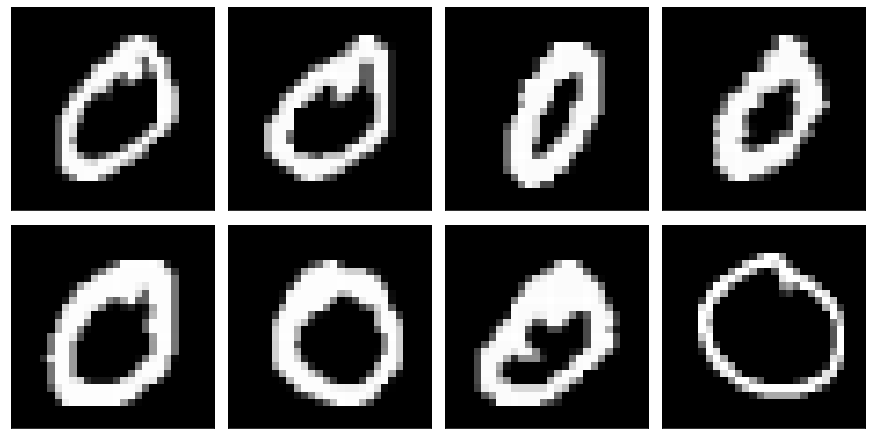

In [7]:

index_data_0 = np.array(range(nPlot))
plot_data_grid(x_train, index_data_0, nRow, nCol)

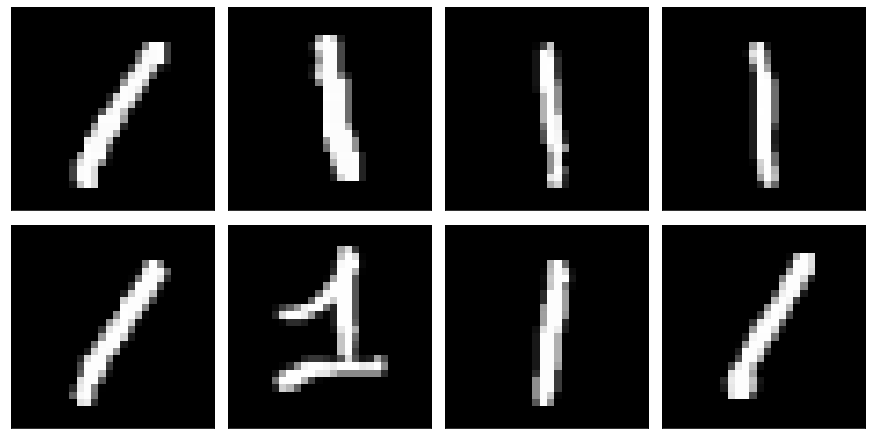

In [8]:
index_data_1 = index_data_0 + 5000
plot_data_grid(x_train, index_data_1, nRow, nCol)

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## linear layer

In [9]:
def layer_linear(input, weight):

    output = np.dot(input,weight.T)

    return output

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## activation function : Sigmoid

In [10]:
def activation_sigmoid(input):

    output = 1 / (1+np.exp(-input))
    return output

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## compute prediction by the forward propagation of the neural network

In [11]:
def compute_prediction(input, weight):

    output      = layer_linear(input,weight)
    prediction  = activation_sigmoid(output)

    return prediction

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## compute loss function

In [12]:
def compute_loss(prediction, label):

    loss            = np.sum(-1 * (label * np.log(prediction) + (1-label) * np.log(1-prediction)))
    loss_average    = loss / len(label)

    return loss_average

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## compute gradient

In [13]:
def compute_gradient(input, prediction, label):

    residual    =  (prediction-label).dot(input)
    gradient    =  residual / len(label)

    return gradient

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## compute accuracy

In [14]:
def compute_accuracy(prediction, label):

    threshold   = 0.5
    temp        = [0 if i < threshold else 1 for i in prediction]
    bCorrect    = [True if temp[i]==label[i] else False for i in range(len(label))]
    accuracy    = np.sum(bCorrect) / len(label)

    return accuracy

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## initialize weight

In [15]:
length_weight   = vector_x_train.shape[1]
weight          = np.ones(length_weight)
weight          = weight * 0.001

print('number of weights: ', length_weight)

number of weights:  784


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## hyper-parameters

In [16]:
number_iteration    = 1000
learning_rate       = 0.1

## variables for optimization information

In [17]:
loss_train_iteration        = np.zeros(number_iteration)
loss_test_iteration         = np.zeros(number_iteration)

accuracy_train_iteration    = np.zeros(number_iteration)
accuracy_test_iteration     = np.zeros(number_iteration)

pred_0_train_mean_iteration = np.zeros(number_iteration) 
pred_0_train_std_iteration  = np.zeros(number_iteration) 
pred_1_train_mean_iteration = np.zeros(number_iteration) 
pred_1_train_std_iteration  = np.zeros(number_iteration) 

pred_0_test_mean_iteration = np.zeros(number_iteration) 
pred_0_test_std_iteration  = np.zeros(number_iteration) 
pred_1_test_mean_iteration = np.zeros(number_iteration) 
pred_1_test_std_iteration  = np.zeros(number_iteration) 

## gradient descent iterations

In [18]:
for i in tqdm(range(number_iteration)):

    prediction_train    = compute_prediction(vector_x_train,weight)
    prediction_test     = compute_prediction(vector_x_test,weight)

    gradient_train      = compute_gradient(vector_x_train,prediction_train,y_train)
    weight              = weight - learning_rate * gradient_train

    prediction_train    = compute_prediction(vector_x_train,weight)
    prediction_test     = compute_prediction(vector_x_test,weight)

    loss_train          = compute_loss(prediction_train,y_train)
    loss_test           = compute_loss(prediction_test,y_test)

    accuracy_train      = compute_accuracy(prediction_train,y_train)
    accuracy_test       = compute_accuracy(prediction_test,y_test)

    pred_train_0    = prediction_train[index_train_0]
    pred_train_1    = prediction_train[index_train_1]

    pred_test_0     = prediction_test[index_test_0]
    pred_test_1     = prediction_test[index_test_1]

    pred_0_train_mean_iteration[i]  = np.mean(pred_train_0)
    pred_0_train_std_iteration[i]   = np.std(pred_train_0)
    pred_1_train_mean_iteration[i]  = np.mean(pred_train_1)
    pred_1_train_std_iteration[i]   = np.std(pred_train_1)

    pred_0_test_mean_iteration[i]   = np.mean(pred_train_0)
    pred_0_test_std_iteration[i]    = np.std(pred_train_0)
    pred_1_test_mean_iteration[i]   = np.mean(pred_train_1)
    pred_1_test_std_iteration[i]    = np.std(pred_train_1)

    loss_train_iteration[i]         = loss_train
    loss_test_iteration[i]          = loss_test

    accuracy_train_iteration[i]     = accuracy_train 
    accuracy_test_iteration[i]      = accuracy_test

100%|██████████| 1000/1000 [00:54<00:00, 18.27it/s]


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## plot curve

In [20]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [21]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [22]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [23]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve

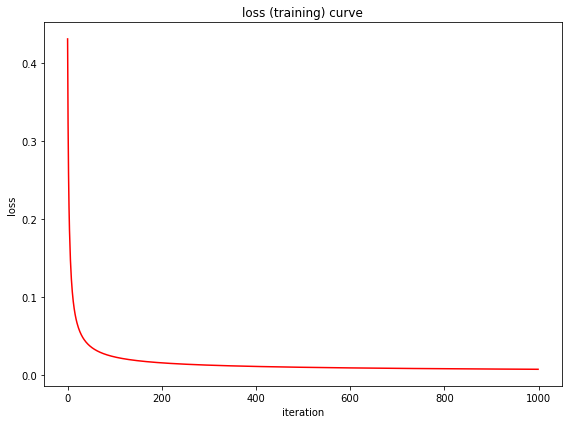

In [24]:
plot_curve(loss_train_iteration, 'iteration', 'loss', 'loss (training) curve')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## loss (testing) curve

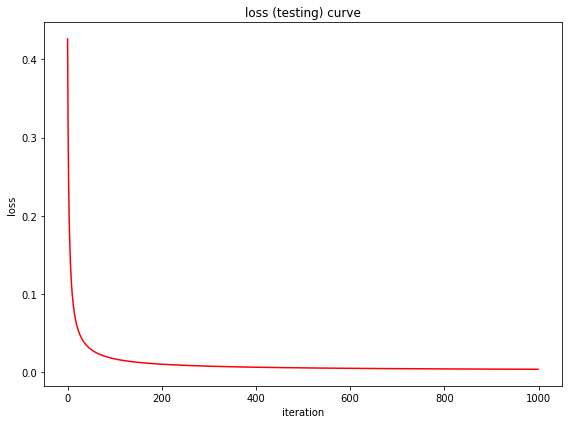

In [26]:
plot_curve(loss_test_iteration, 'iteration', 'loss', 'loss (testing) curve')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## accuracy (training) curve

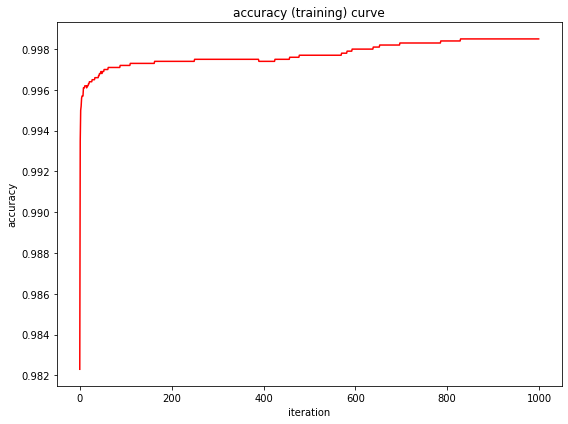

In [27]:
plot_curve(accuracy_train_iteration, 'iteration', 'accuracy', 'accuracy (training) curve')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## accuracy (testing) curve

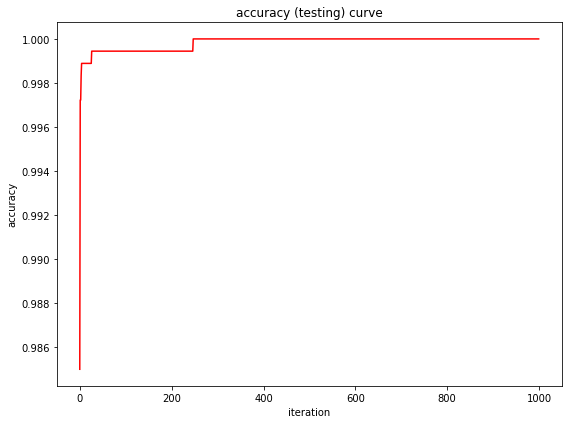

In [28]:
plot_curve(accuracy_test_iteration, 'iteration', 'accuracy', 'accuracy (testing) curve')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## plot prediction values

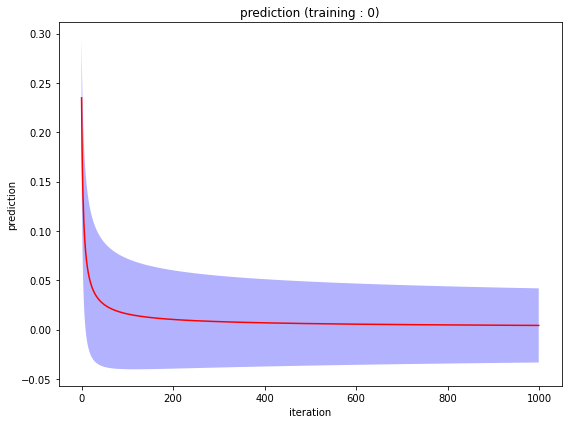

In [29]:
plot_curve_error(pred_0_train_mean_iteration, pred_0_train_std_iteration, 'iteration', 'prediction', 'prediction (training : 0)')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

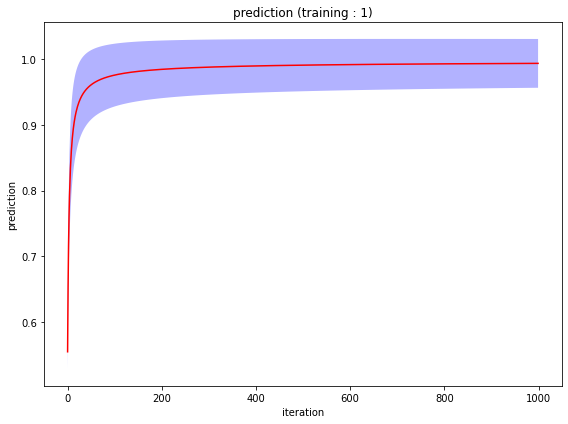

In [30]:
plot_curve_error(pred_1_train_mean_iteration, pred_1_train_std_iteration, 'iteration', 'prediction', 'prediction (training : 1)')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

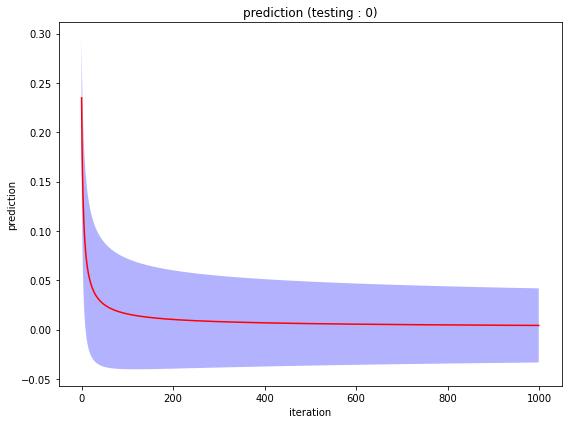

In [31]:
plot_curve_error(pred_0_test_mean_iteration, pred_0_test_std_iteration, 'iteration', 'prediction', 'prediction (testing : 0)')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

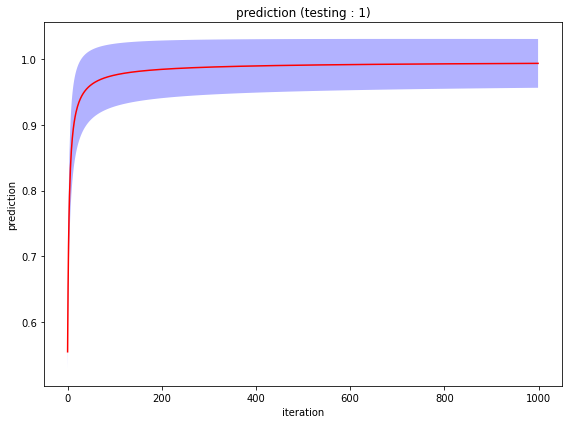

In [32]:
plot_curve_error(pred_1_test_mean_iteration, pred_1_test_std_iteration, 'iteration', 'prediction', 'prediction (testing : 1)')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## print values

In [33]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [34]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss

In [35]:
print_curve(loss_train_iteration, index)

index =    0, value = 0.4307224938
index =  100, value = 0.0228587163
index =  200, value = 0.0152848437
index =  300, value = 0.0123252409
index =  400, value = 0.0106733249
index =  500, value = 0.0095914393
index =  600, value = 0.0088148843
index =  700, value = 0.0082233149
index =  800, value = 0.0077534390
index =  900, value = 0.0073684871


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## testing loss

In [36]:
print_curve(loss_test_iteration, index)

index =    0, value = 0.4263057540
index =  100, value = 0.0167458571
index =  200, value = 0.0099479648
index =  300, value = 0.0074345387
index =  400, value = 0.0060961283
index =  500, value = 0.0052563282
index =  600, value = 0.0046772451
index =  700, value = 0.0042526445
index =  800, value = 0.0039275776
index =  900, value = 0.0036706180


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## training accuracy

In [37]:
print_curve(accuracy_train_iteration, index)

index =    0, value = 0.9823000000
index =  100, value = 0.9972000000
index =  200, value = 0.9974000000
index =  300, value = 0.9975000000
index =  400, value = 0.9974000000
index =  500, value = 0.9977000000
index =  600, value = 0.9980000000
index =  700, value = 0.9983000000
index =  800, value = 0.9984000000
index =  900, value = 0.9985000000


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## testing accuracy

In [38]:
print_curve(accuracy_test_iteration, index)

index =    0, value = 0.9850000000
index =  100, value = 0.9994444444
index =  200, value = 0.9994444444
index =  300, value = 1.0000000000
index =  400, value = 1.0000000000
index =  500, value = 1.0000000000
index =  600, value = 1.0000000000
index =  700, value = 1.0000000000
index =  800, value = 1.0000000000
index =  900, value = 1.0000000000


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## functions for presenting the results

In [39]:
def function_results_01(data,nRow,nCol):
    nPlot      = nRow * nCol
    index_data = np.array(range(nPlot))
    fig, axes  = plt.subplots(nRow,nCol,constrained_layout=True,figsize=(nCol*3,nRow*3))

    for i in range(nRow):
        for j in range(nCol):

            k     = i * nCol + j
            index = index_data[k]

            axes[i,j].imshow(data[index],cmap='gray',vmin=0,vmax=1)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
    plt.show() 

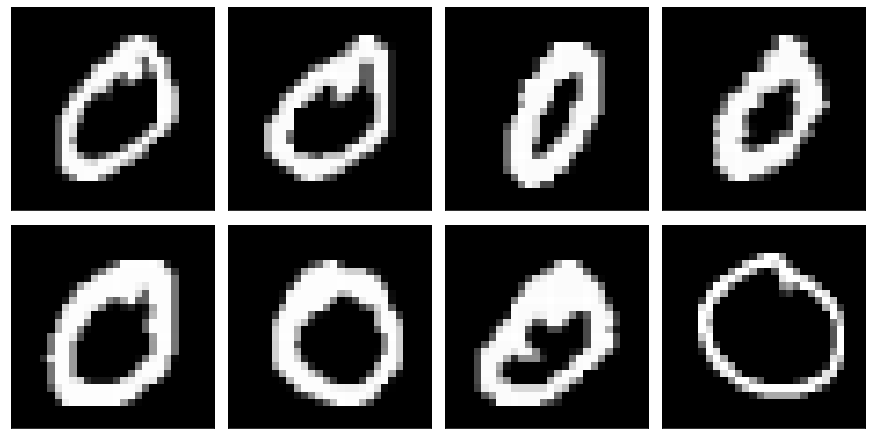

In [40]:
function_results_01(x_train,2,4)

In [41]:
def function_results_02(data,nRow,nCol):
    nPlot      = nRow * nCol
    index_data = np.array(range(nPlot))
    index_data = index_data + 5000
    fig, axes  = plt.subplots(nRow,nCol,constrained_layout=True,figsize=(nCol*3,nRow*3))

    for i in range(nRow):
        for j in range(nCol):

            k     = i * nCol + j
            index = index_data[k]

            axes[i,j].imshow(data[index],cmap='gray',vmin=0,vmax=1)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
    plt.show()

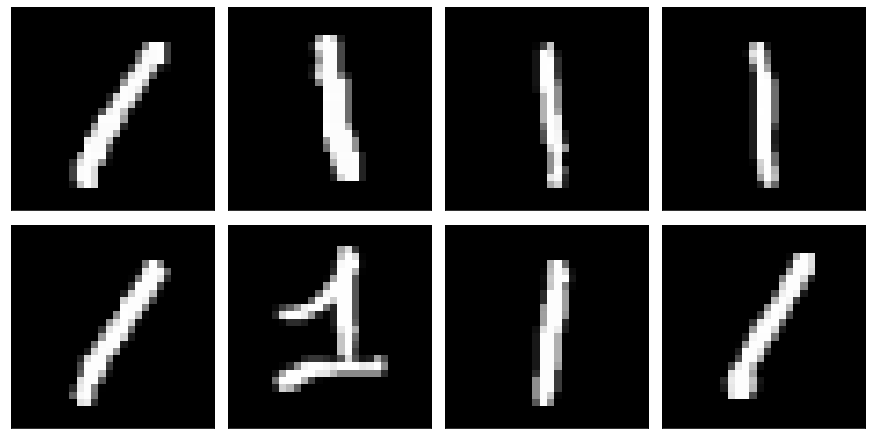

In [43]:
function_results_02(x_train,nRow=2,nCol=4)

In [44]:
def function_results_03():
    plot_curve(loss_train_iteration, 'iteration', 'loss', 'loss (training) curve')

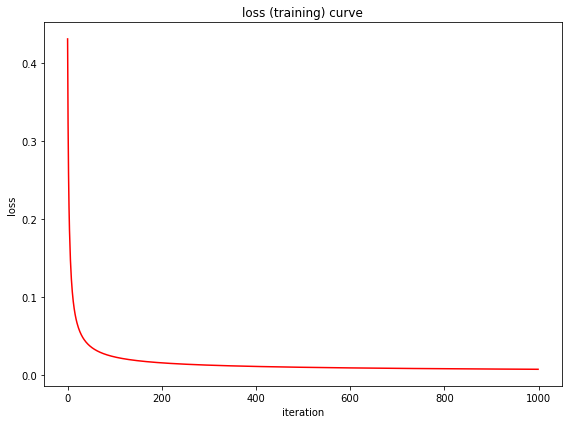

In [45]:
function_results_03()

In [46]:
def function_results_04():
    plot_curve(loss_test_iteration, 'iteration', 'loss', 'loss (testing) curve')

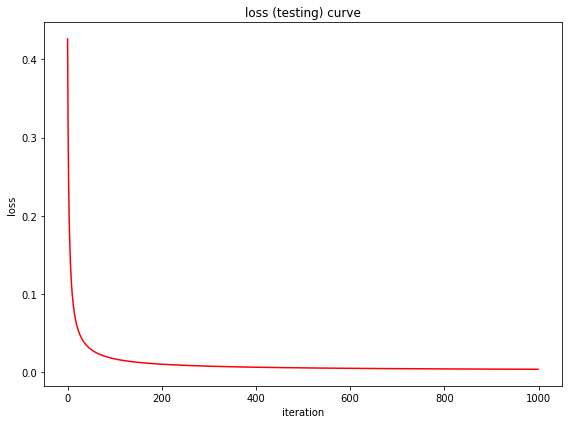

In [47]:
function_results_04()

In [48]:
def function_results_05():
    plot_curve(accuracy_train_iteration, 'iteration', 'accuracy', 'accuracy (training) curve')

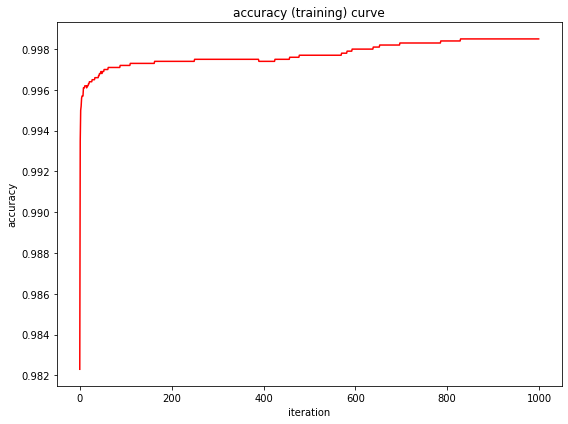

In [49]:
function_results_05()

In [50]:
def function_results_06():
    plot_curve(accuracy_test_iteration, 'iteration', 'accuracy', 'accuracy (testing) curve')

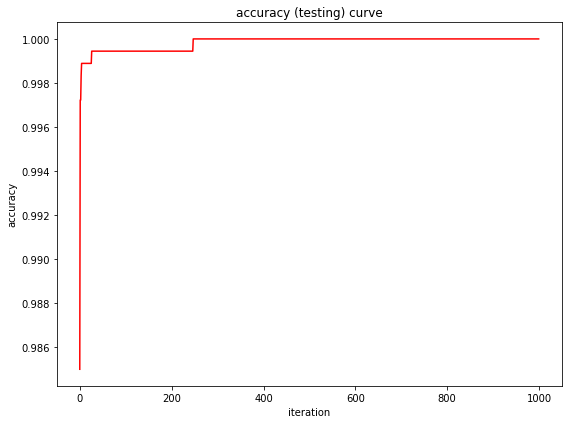

In [51]:
function_results_06()

In [52]:
def function_results_07():
    plot_curve_error(pred_0_train_mean_iteration, pred_0_train_std_iteration, 'iteration', 'prediction', 'prediction (training : 0)')

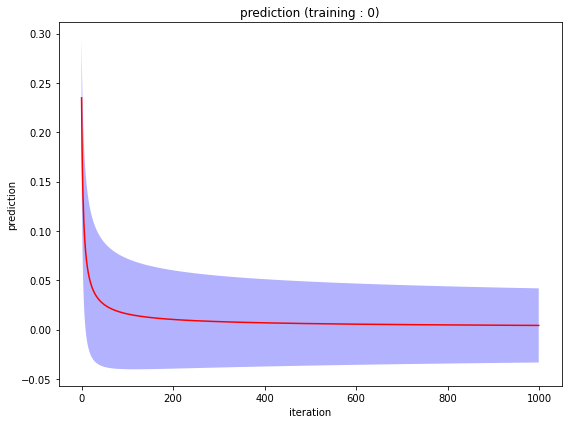

In [53]:
function_results_07()

In [54]:
def function_results_08():
    plot_curve_error(pred_1_train_mean_iteration, pred_1_train_std_iteration, 'iteration', 'prediction', 'prediction (training : 1)')


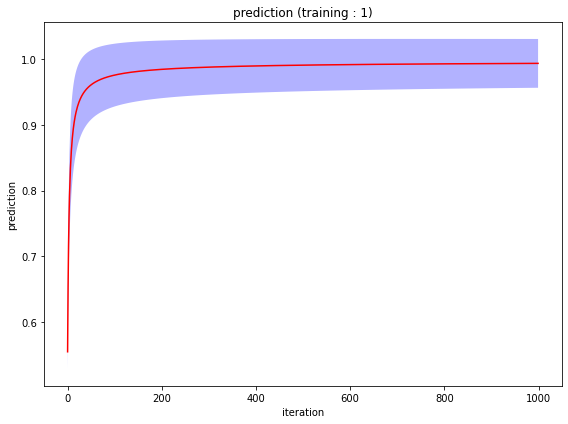

In [55]:
function_results_08()

In [56]:
def function_results_09():
    plot_curve_error(pred_0_test_mean_iteration, pred_0_test_std_iteration, 'iteration', 'prediction', 'prediction (testing : 0)')

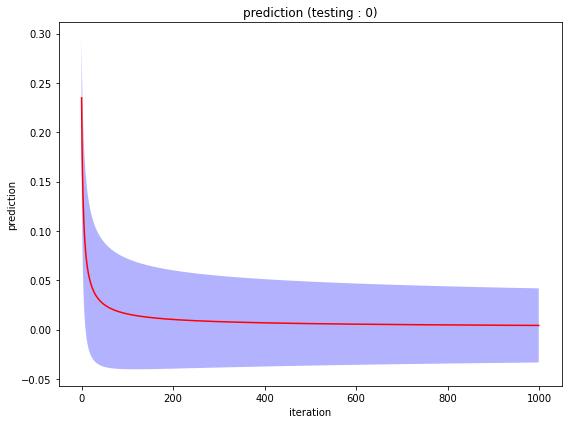

In [57]:
function_results_09()

In [58]:
def function_results_10():
    plot_curve_error(pred_1_test_mean_iteration, pred_1_test_std_iteration, 'iteration', 'prediction', 'prediction (testing : 1)')

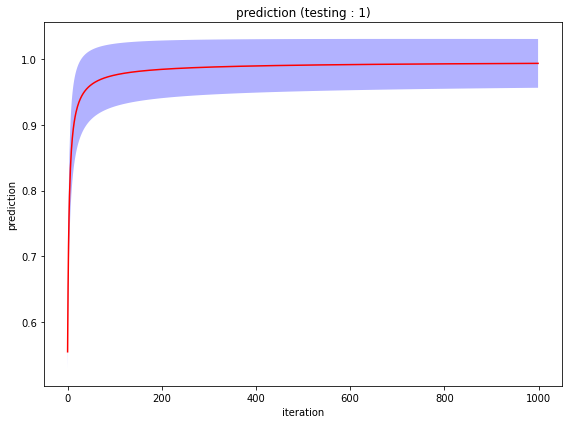

In [59]:
function_results_10()

In [60]:
def function_results_11(data):
    
    index = np.array([0,100,200,300,400,500,600,700,800,900])

    for idx in index:
        val = data[idx]
        print('index = %4d, value = %12.10f' % (idx, val))

In [61]:
function_results_11(loss_train_iteration)

index =    0, value = 0.4307224938
index =  100, value = 0.0228587163
index =  200, value = 0.0152848437
index =  300, value = 0.0123252409
index =  400, value = 0.0106733249
index =  500, value = 0.0095914393
index =  600, value = 0.0088148843
index =  700, value = 0.0082233149
index =  800, value = 0.0077534390
index =  900, value = 0.0073684871


In [62]:
def function_results_12(data):
    
    index = np.array([0,100,200,300,400,500,600,700,800,900])

    for idx in index:
        val = data[idx]
        print('index = %4d, value = %12.10f' % (idx, val))

In [63]:
function_results_12(loss_test_iteration)

index =    0, value = 0.4263057540
index =  100, value = 0.0167458571
index =  200, value = 0.0099479648
index =  300, value = 0.0074345387
index =  400, value = 0.0060961283
index =  500, value = 0.0052563282
index =  600, value = 0.0046772451
index =  700, value = 0.0042526445
index =  800, value = 0.0039275776
index =  900, value = 0.0036706180


In [64]:
def function_results_13(data):
    
    index = np.array([0,100,200,300,400,500,600,700,800,900])

    for idx in index:
        val = data[idx]
        print('index = %4d, value = %12.10f' % (idx, val))

In [65]:
function_results_13(accuracy_train_iteration)

index =    0, value = 0.9823000000
index =  100, value = 0.9972000000
index =  200, value = 0.9974000000
index =  300, value = 0.9975000000
index =  400, value = 0.9974000000
index =  500, value = 0.9977000000
index =  600, value = 0.9980000000
index =  700, value = 0.9983000000
index =  800, value = 0.9984000000
index =  900, value = 0.9985000000


In [66]:
def function_results_14(data):
        
    index = np.array([0,100,200,300,400,500,600,700,800,900])

    for idx in index:
        val = data[idx]
        print('index = %4d, value = %12.10f' % (idx, val))

In [67]:
function_results_14(accuracy_test_iteration)

index =    0, value = 0.9850000000
index =  100, value = 0.9994444444
index =  200, value = 0.9994444444
index =  300, value = 1.0000000000
index =  400, value = 1.0000000000
index =  500, value = 1.0000000000
index =  600, value = 1.0000000000
index =  700, value = 1.0000000000
index =  800, value = 1.0000000000
index =  900, value = 1.0000000000


---

# RESULTS

---

## # 01. plot examples of the input training images for '0'

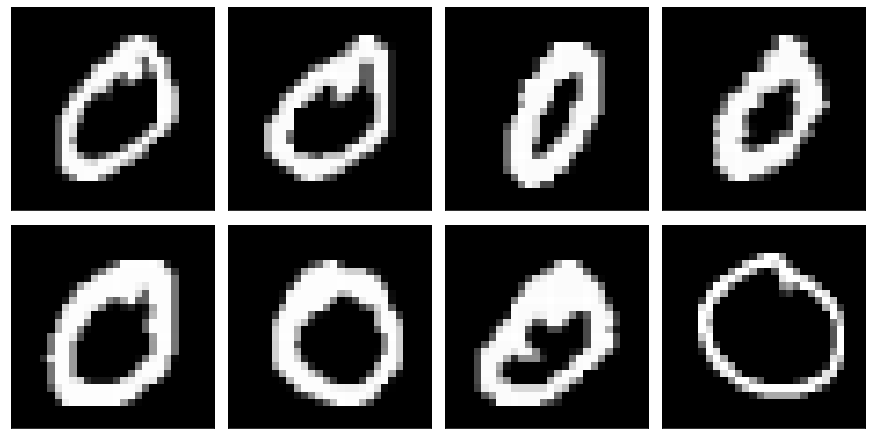

In [68]:
function_results_01(x_train,2,4)

## # 02. plot examples of the input training images for '1'

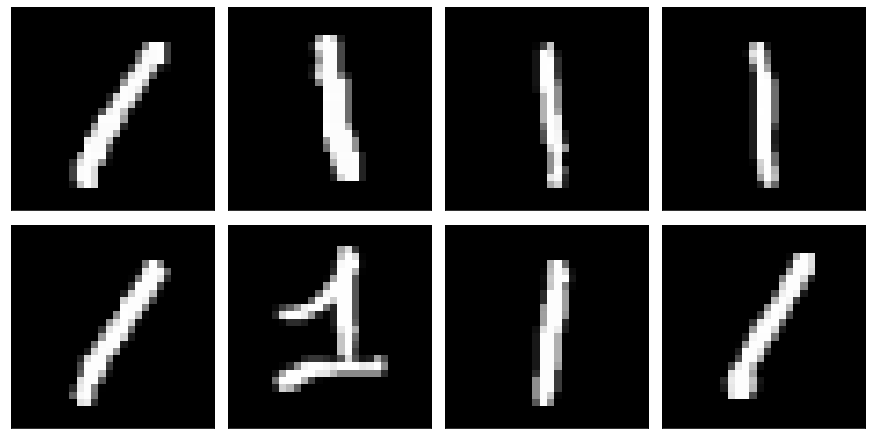

In [69]:
function_results_02(x_train,2,4)

## # 03. plot the training loss curve (x-axis: iteration, y-axis: loss)

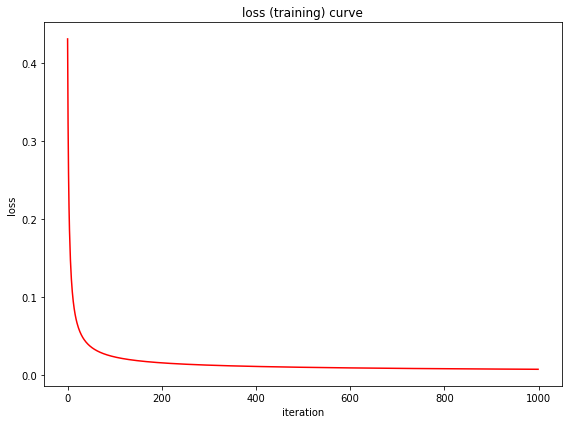

In [70]:
function_results_03()

## # 04. plot the testing loss curve (x-axis: iteration, y-axis: loss)

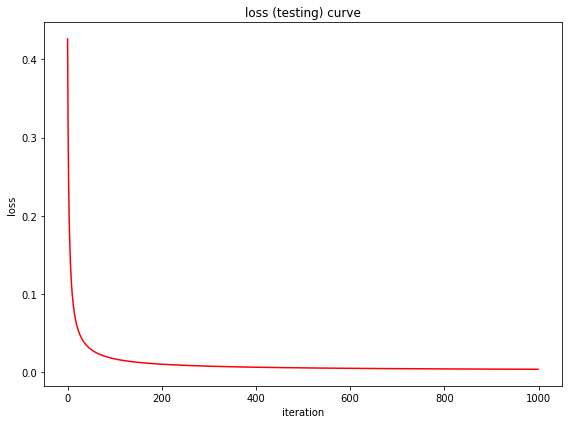

In [71]:
function_results_04()

## # 05. plot the training accuracy curve (x-axis: iteration, y-axis: accuracy)

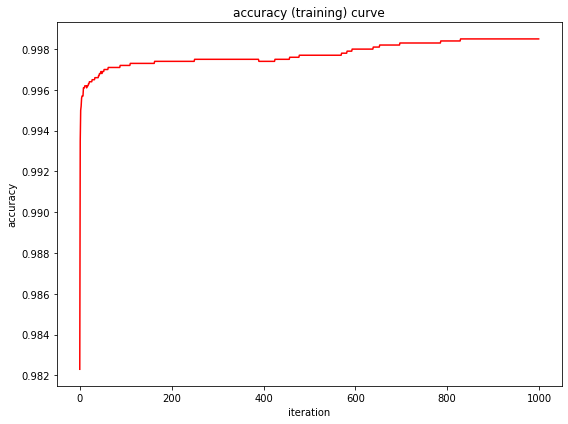

In [72]:
function_results_05()

## # 06. plot the testing accuracy curve (x-axis: iteration, y-axis: accuracy)

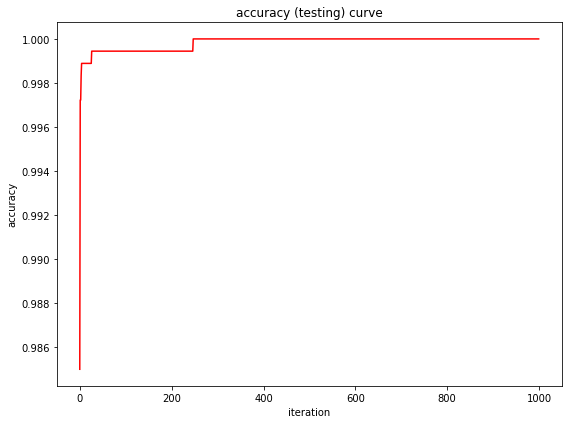

In [73]:
function_results_06()

## # 07. plot the training prediction curve (mean and std) for image 0 (x-axis: iteration, y-axis: prediction)

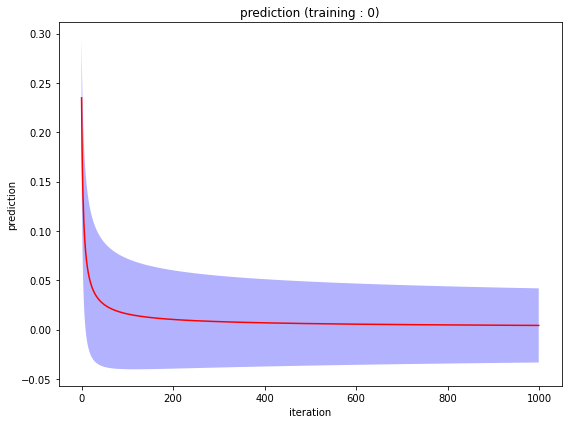

In [74]:
function_results_07()

## # 08. plot the training prediction curve (mean and std) for image 1 (x-axis: iteration, y-axis: prediction)

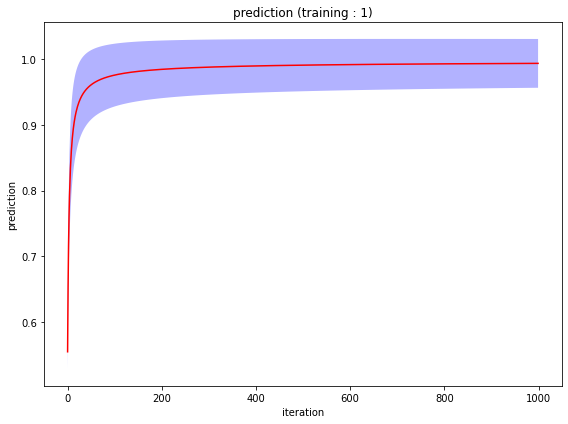

In [75]:
function_results_08()

## # 09. plot the testing prediction curve (mean and std) for image 0 (x-axis: iteration, y-axis: prediction)

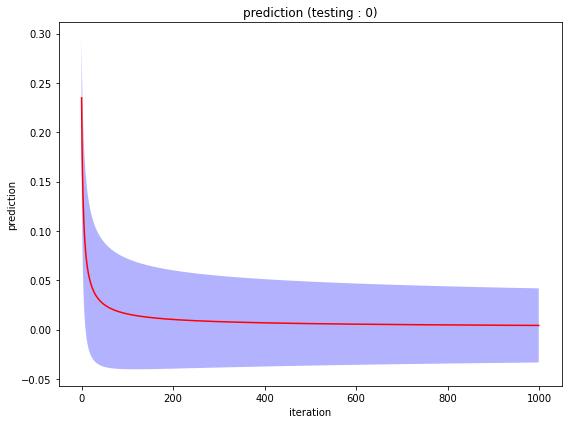

In [76]:
function_results_09()

## # 10. plot the testing prediction curve (mean and std) for image 1 (x-axis: iteration, y-axis: prediction)

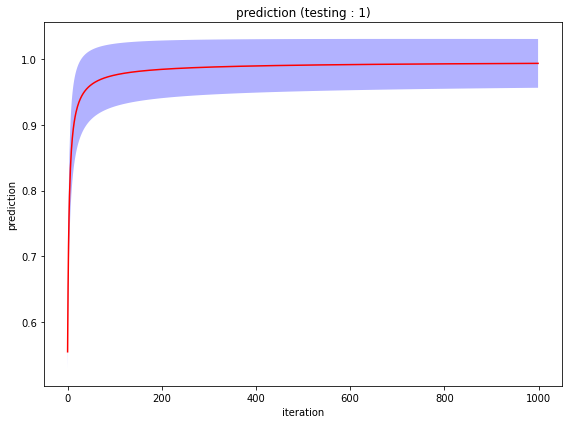

In [77]:
function_results_10()

## # 11. print the training loss at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [78]:
function_results_11(loss_train_iteration)

index =    0, value = 0.4307224938
index =  100, value = 0.0228587163
index =  200, value = 0.0152848437
index =  300, value = 0.0123252409
index =  400, value = 0.0106733249
index =  500, value = 0.0095914393
index =  600, value = 0.0088148843
index =  700, value = 0.0082233149
index =  800, value = 0.0077534390
index =  900, value = 0.0073684871


## # 12. print the testing loss at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [79]:
function_results_12(loss_test_iteration)

index =    0, value = 0.4263057540
index =  100, value = 0.0167458571
index =  200, value = 0.0099479648
index =  300, value = 0.0074345387
index =  400, value = 0.0060961283
index =  500, value = 0.0052563282
index =  600, value = 0.0046772451
index =  700, value = 0.0042526445
index =  800, value = 0.0039275776
index =  900, value = 0.0036706180


## # 13. print the training accuracy at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [80]:
function_results_13(accuracy_train_iteration)

index =    0, value = 0.9823000000
index =  100, value = 0.9972000000
index =  200, value = 0.9974000000
index =  300, value = 0.9975000000
index =  400, value = 0.9974000000
index =  500, value = 0.9977000000
index =  600, value = 0.9980000000
index =  700, value = 0.9983000000
index =  800, value = 0.9984000000
index =  900, value = 0.9985000000


## # 14. print the testing accuracy at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [81]:
function_results_14(accuracy_test_iteration)

index =    0, value = 0.9850000000
index =  100, value = 0.9994444444
index =  200, value = 0.9994444444
index =  300, value = 1.0000000000
index =  400, value = 1.0000000000
index =  500, value = 1.0000000000
index =  600, value = 1.0000000000
index =  700, value = 1.0000000000
index =  800, value = 1.0000000000
index =  900, value = 1.0000000000
